In [2]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x58ece000 @  0x7fbf5dcf22a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [3]:
import torch
from torchvision import datasets, transforms
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


In [4]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2018-12-27 13:22:44--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2018-12-27 13:22:44 (43.7 MB/s) - ‘helper.py’ saved [2813/2813]



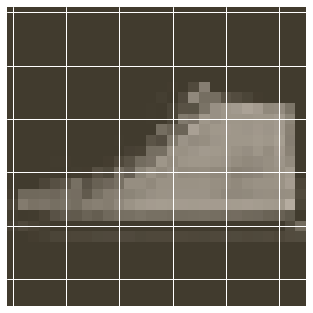

In [5]:
import helper
images, labels = next(iter(trainloader))
helper.imshow(images[0,:]);

In [0]:
from torch import nn
import torch.nn.functional as F
from torch import optim



In [9]:
#changing some hyperparamters such as lr = 0.03 from 0.003 and no of epochs to 40 from 30.
model = nn.Sequential(nn.Linear(784,256),nn.ReLU(),nn.Dropout(p=0.2),nn.Linear(256,10),nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(),lr=0.03)

epochs = 40
steps = 0
train_losses, test_losses = [], []


for e in range(epochs):
  running_loss = 0
  for images , labels in trainloader:
    optimizer.zero_grad()
  
    images = images.flatten(start_dim=1)
  
    output = model(images)
  
    loss = criterion(output,labels)
  
    loss.backward()
  
    optimizer.step()
    
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    with torch.no_grad():
      model.eval()
      for images , labels in testloader:
        images = images.flatten(start_dim=1)
        log_ps = model(images)
        test_loss += criterion(log_ps,labels)
        
        
        ps = torch.exp(log_ps)
        top_p , top_class = ps.topk(1,dim=1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))    
    model.train()
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))    
    print("Epoch: {}/{}.. ".format(e+1, epochs),"Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),"Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),"Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
    

Epoch: 1/40..  Training Loss: 0.640..  Test Loss: 0.517..  Test Accuracy: 0.810
Epoch: 2/40..  Training Loss: 0.459..  Test Loss: 0.444..  Test Accuracy: 0.838
Epoch: 3/40..  Training Loss: 0.416..  Test Loss: 0.433..  Test Accuracy: 0.843
Epoch: 4/40..  Training Loss: 0.389..  Test Loss: 0.412..  Test Accuracy: 0.853
Epoch: 5/40..  Training Loss: 0.370..  Test Loss: 0.397..  Test Accuracy: 0.856
Epoch: 6/40..  Training Loss: 0.355..  Test Loss: 0.382..  Test Accuracy: 0.862
Epoch: 7/40..  Training Loss: 0.343..  Test Loss: 0.383..  Test Accuracy: 0.864
Epoch: 8/40..  Training Loss: 0.332..  Test Loss: 0.361..  Test Accuracy: 0.872
Epoch: 9/40..  Training Loss: 0.323..  Test Loss: 0.367..  Test Accuracy: 0.864
Epoch: 10/40..  Training Loss: 0.314..  Test Loss: 0.355..  Test Accuracy: 0.872
Epoch: 11/40..  Training Loss: 0.306..  Test Loss: 0.359..  Test Accuracy: 0.871
Epoch: 12/40..  Training Loss: 0.298..  Test Loss: 0.345..  Test Accuracy: 0.876
Epoch: 13/40..  Training Loss: 0.294.

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

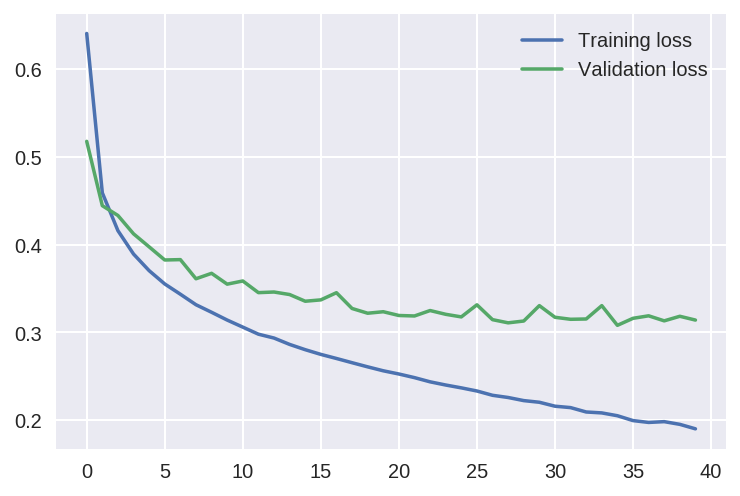

In [11]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [0]:
print(model)

In [0]:
print(model.state_dict().keys())